# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad de la persona en m/s y la aceleración 
del policía en m/s**2, separados por un espacio:
 10 3


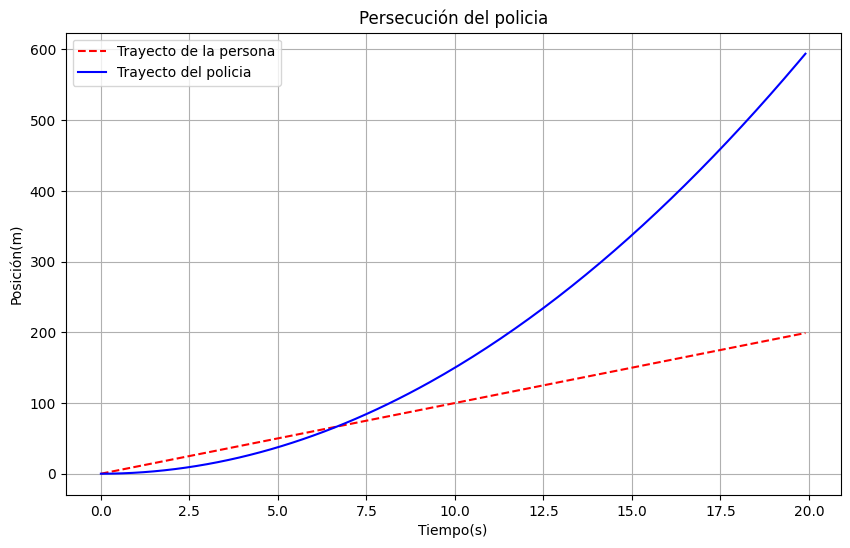

In [1]:
#Importamos librerias
import numpy as np
import matplotlib.pyplot as plt

#obtenemos los valores de velocidad y aceleracion
Vm, Ap = map(float, input("Ingrese la velocidad de la persona en m/s y la aceleración \ndel policía en m/s**2, separados por un espacio:\n").split())

#creamos un array con valores de tiempo
tiempo = np.arange(0,20,0.1)

#Trayectoria de la persona
Xm = Vm * tiempo

#Tratectoria del policia
Xp = 0.5 * Ap * np.power(tiempo,2)

plt.figure(figsize=(10, 6))
plt.plot(tiempo, Xm, 'r--', label='Trayecto de la persona') # Grafica de la persona
plt.plot(tiempo, Xp, 'b-', label='Trayecto del policia') # Grafica del policia

# Agregar títulos y etiquetas
plt.title('Persecución del policia')
plt.ylabel('Posición(m)')
plt.xlabel('Tiempo(s)')
plt.legend()
plt.grid(True)

plt.show()

#Miramos en que tiempo se encuantran
P = Xp == Xm 

#Usando un ciclo recorremos P para encontrar el indice del tiempo donde se encuentran
for i, el in enumerate(P):
    if el == True and i !=0:
        print(f"el policia y la persona se encuentran en un tiempo :{tiempo[i]} s")

## 2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:58: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3460\1363969819.py:58: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Verificación del mínimo del potencial para distintos $\sigma$')


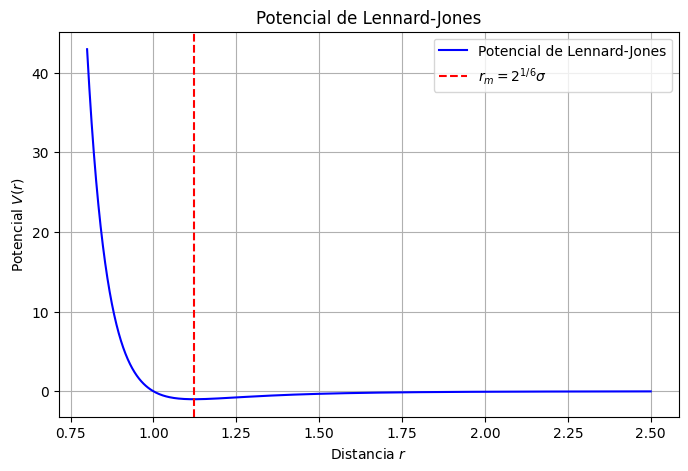

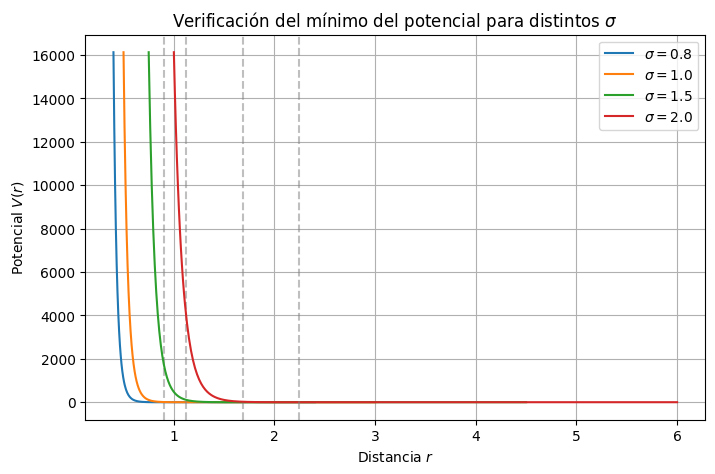

In [3]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

#Función para modelar el potencial de Lennard-Jones

def lennard_jones_potential(r, epsilon=1.0, sigma=1.0):
    term1 = (sigma / r)**12 
    term2 = (sigma / r)**6   
    return 4 * epsilon * (term1 - term2)

# Graficar el potencial y mostrar el punto mínimo teórico

# Definimos los parámetros
epsilon = 1.0
sigma = 1.0

# Creamos un rango de valores de r desde 0.8*sigma hasta 2.5*sigma
r = np.linspace(0.8 * sigma, 2.5 * sigma, 500)

# Calculamos el potencial para cada valor de r
V = lennard_jones_potential(r, epsilon, sigma)

# Calculamos la distancia de equilibrio
r_min = 2**(1/6) * sigma

# Graficamos el potencial
plt.figure(figsize=(8, 5))
plt.plot(r, V, label='Potencial de Lennard-Jones', color='blue')
plt.axvline(r_min, color='red', linestyle='--', label=r'$r_m = 2^{1/6}\sigma$')
plt.title('Potencial de Lennard-Jones')
plt.xlabel('Distancia $r$')
plt.ylabel('Potencial $V(r)$')
plt.grid(True)
plt.legend()
plt.show()



# Definimos varios valores de sigma 
sigmas = [0.8, 1.0, 1.5, 2.0]

# Creamos una nueva figura
plt.figure(figsize=(8, 5))

# Iteramos sobre los valores de sigma
for sigma in sigmas:
    r = np.linspace(0.5 * sigma, 3 * sigma, 500)  # Rango adaptado a sigma
    V = lennard_jones_potential(r, epsilon=1.0, sigma=sigma)  # Calculamos 
    r_min = 2**(1/6) * sigma  # Distancia de equilibrio

    # Graficamos cada curva 
    plt.plot(r, V, label=fr'$\sigma = {sigma}$')
    plt.axvline(r_min, linestyle='--', color='gray', alpha=0.5)  # Línea en r_m


plt.title('Verificación del mínimo del potencial para distintos $\sigma$')
plt.xlabel('Distancia $r$')
plt.ylabel('Potencial $V(r)$')
plt.grid(True)
plt.legend()
plt.show()


##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [1]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

#Pasamos la tabla a Dataframe
df = pd.DataFrame(alturas)



In [2]:
df

,Unnamed: 0,Country,"Average Height, Boys, 19 yo (cm)↓",Girls 19 (cm),Boys 19 (in),Girls 19 (in)
0,NaN,Netherlands,184,170,6 ft.,5 ft. 7 in.
1,NaN,Montenegro,183,170,6 ft.,5 ft. 7 in.
2,NaN,Estonia,183,169,6 ft.,5 ft. 6 in.
3,NaN,Bosnia and Herzegovina,182,167,6 ft.,5 ft. 6 in.
4,NaN,Iceland,182,169,6 ft.,5 ft. 7 in.
...,...,...,...,...,...,...
191,NaN,Papua New Guinea,163,157,5 ft. 4 in.,5 ft. 2 in.
192,NaN,Solomon Islands,163,157,5 ft. 4 in.,5 ft. 2 in.
193,NaN,Laos,163,153,5 ft. 4 in.,5 ft.
194,NaN,Timor-Leste,160,153,5 ft. 3 in.,5 ft.


In [3]:
#Eliminar columnas que contienen 'in'
df = df.loc[:, ~df.columns.str.contains('in')]

#Renombrar columnas al español
df = df.rename(columns={
    'Average Height, Boys, 19 yo (cm)↓': 'niños 19(cm)',
    'Girls 19 (cm)': 'niñas 19 (cm)',
    'Country': 'País',
})
df = df.dropna(axis=1)


In [4]:
df

,País,niños 19(cm),niñas 19 (cm)
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
...,...,...,...
191,Papua New Guinea,163,157
192,Solomon Islands,163,157
193,Laos,163,153
194,Timor-Leste,160,153


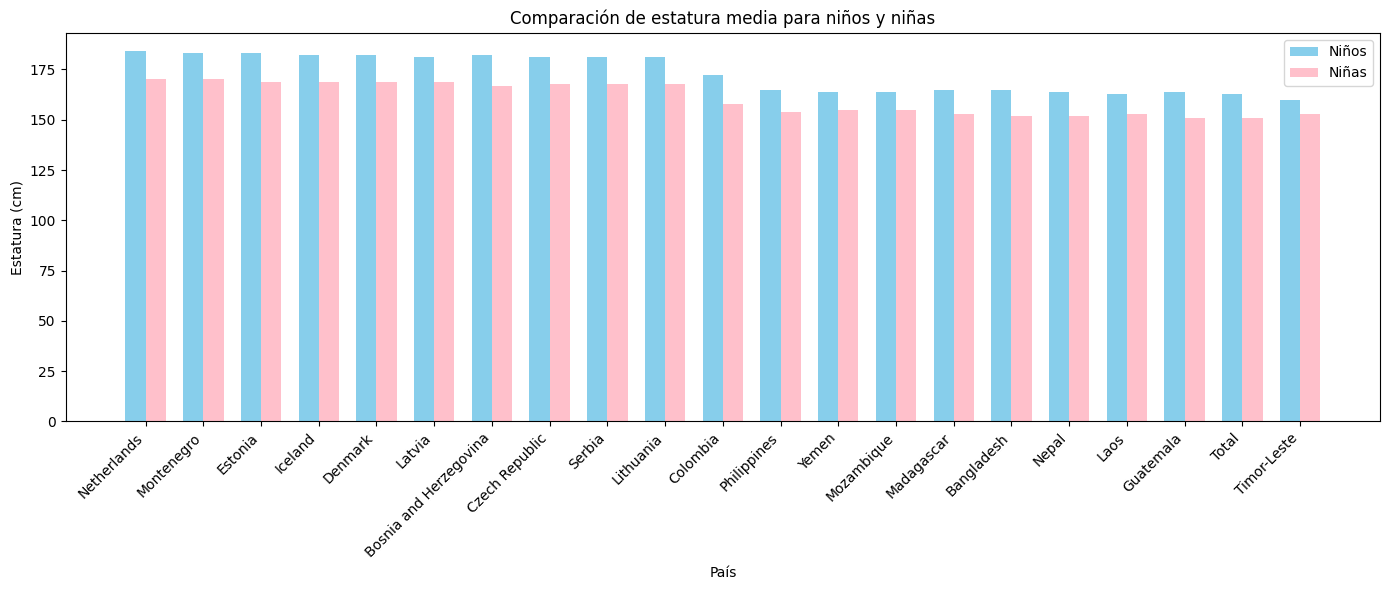

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
# Calcular promedio de estatura 
df['Promedio'] = (df['niños 19(cm)'] + df['niñas 19 (cm)']) / 2

# Seleccionar los 10 países con mayor y menor promedio de estatura
top10 = df.nlargest(10, 'Promedio')
bottom10 = df.nsmallest(10, 'Promedio')

# Incluir a Colombia
colombia = df[df['País'] == 'Colombia']

# Unir todos y eliminar duplicados
df_filtrado = pd.concat([top10, bottom10, colombia]).drop_duplicates(subset='País')

# Ordenar para visualización
df_filtrado = df_filtrado.sort_values(by='Promedio', ascending=False)

# Gráfico de barras
plt.figure(figsize=(14, 6))
x = df_filtrado['País']
niños = df_filtrado['niños 19(cm)']
niñas = df_filtrado['niñas 19 (cm)']

bar_width = 0.35
index = range(len(x))

plt.bar(index, niños, width=bar_width, label='Niños', color='skyblue')
plt.bar([i + bar_width for i in index], niñas, width=bar_width, label='Niñas', color='pink')

plt.xlabel('País')
plt.ylabel('Estatura (cm)')
plt.title('Comparación de estatura media para niños y niñas')
plt.xticks([i + bar_width/2 for i in index], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
income

,Unnamed: 0,Country,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,NaN,Switzerland,"$685,226","$120,431",$4.8T,1.1%
1,NaN,Luxembourg,"$585,950","$163,432",$299B,0.1%
2,NaN,United States,"$551,347","$100,380",$139.9T,30.8%
3,NaN,Hong Kong,"$551,194","$57,168",$3.5T,0.8%
4,NaN,Iceland,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...,...
215,NaN,Anguilla,NaN,"$32,835",NaN,NaN
216,NaN,Cook Islands,NaN,"$29,907",NaN,NaN
217,NaN,Nauru,NaN,"$23,044",NaN,NaN
218,NaN,Tuvalu,NaN,"$7,773",NaN,NaN


In [7]:
income = income.drop(income.columns[[0, 3, 4, 5]], axis=1)
income = income.rename( columns = {'Wealth per Adult 2022↓': 'Riqueza', 'Country':'País'})

In [8]:
income

,País,Riqueza
0,Switzerland,"$685,226"
1,Luxembourg,"$585,950"
2,United States,"$551,347"
3,Hong Kong,"$551,194"
4,Iceland,"$498,290"
...,...,...
215,Anguilla,NaN
216,Cook Islands,NaN
217,Nauru,NaN
218,Tuvalu,NaN


In [12]:
income['Riqueza'] = (
    income['Riqueza']
    .astype(str) 
    .str.replace('$', '', regex=False)      # Quitar el signo $
    .str.replace(',', '', regex=False)      # Quitar las comas de miles
    .astype(float)                          # Convertir a float o usa .astype(int) si estás seguro que no hay decimales
)



In [13]:
income

,País,Riqueza
0,Switzerland,685226.0
1,Luxembourg,585950.0
2,United States,551347.0
3,Hong Kong,551194.0
4,Iceland,498290.0
...,...,...
215,Anguilla,NaN
216,Cook Islands,NaN
217,Nauru,NaN
218,Tuvalu,NaN


In [14]:
df_combinado = pd.merge(df, income, on='País', how='inner')

In [15]:
df_combinado

,País,niños 19(cm),niñas 19 (cm),Promedio,Riqueza
0,Netherlands,184,170,177.0,358235.0
1,Montenegro,183,170,176.5,81900.0
2,Estonia,183,169,176.0,78777.0
3,Bosnia and Herzegovina,182,167,174.5,33593.0
4,Iceland,182,169,175.5,498290.0
...,...,...,...,...,...
188,Mozambique,164,155,159.5,1353.0
189,Papua New Guinea,163,157,160.0,8606.0
190,Solomon Islands,163,157,160.0,11660.0
191,Laos,163,153,158.0,6191.0
